# Topic Analysis
Cluster speech data into distinct topics

## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

## Plot Settings

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE

In [33]:
# format style
plt.style.use('fivethirtyeight')
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=18)

## Functions

In [3]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += "; ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

## Data

In [4]:
transcripts = pd.read_csv('data/cln_transcripts.csv', index_col=0)
transcripts.head()

,Title,Date,President,Type,Transcript
0,"April 30, 1789: First Inaugural Address",1789-04-30,George Washington,inauguration,Fellow Citizens of the Senate and the House of...
1,"October 3, 1789: Thanksgiving Proclamation",1789-10-03,George Washington,other,Whereas it is the duty of all Nations to ackno...
2,"January 8, 1790: First Annual Message to Congress",1790-01-08,George Washington,state_union,Fellow Citizens of the Senate and House of Rep...
3,"December 8, 1790: Second Annual Message to Con...",1790-12-08,George Washington,state_union,Fellow citizens of the Senate and House of Rep...
4,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29,George Washington,other,"I the President of the United States, by my ow..."


# Vectorize Document Text
Create sparse matrix of word counts for each document (presidential address)

In [5]:
# text data
documents = transcripts['Transcript']

## TFIDF

In [6]:
# create instance of TFIDF vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.05, ngram_range=(1, 3))

In [7]:
# transform documents into document-term matrix
X = tf_vectorizer.fit_transform(documents)

In [8]:
# create dataframe of document-term matrix
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,000,000 000,000 men,000 people,000 year,10,10 000,10 years,100,100 000,...,yes,yesterday,yield,yielding,york,young,young men,young people,youth,zeal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.050819
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02925,0.023455,0.036168,0.0,0.0,0.000000


# Topic Modeling
Generate topics using clustering...

## NMF

In [9]:
# number of topics
num_tops = 20
# create instance of model, input number of topics to output
nmf = NMF(n_components=num_tops, random_state=0)
# run model
nmf.fit(tf_df)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [10]:
# display top words for each topic
print_top_words(nmf, tf_vectorizer.get_feature_names(), 25)


Topic #0: public; commerce; states; congress; british; great; vessels; citizens; war; country; subject; session; treasury; present; tribes; united states; united; necessary; objects; measures; debt; effect; revenue; peace; militia

Topic #1: america; americans; tonight; jobs; new; health; work; health care; children; care; people; american; help; year; child; families; let; businesses; workers; make; economy; insurance; need; college; years

Topic #2: states; united states; united; persons; president united states; president united; proclamation; president; said; united states america; states america; laws; day; independence united states; independence united; whereof; seal; state; city washington; laws united; laws united states; secretary state; thereof; city; america

Topic #3: ve; going; don; people; want; know; got; ll; just; thank; lot; think; like; say; ve got; said; didn; tell; thing; right; everybody; folks; country; years; way

Topic #4: president; mr; mr president; think; c

In [11]:
# assign topic labels
topic_dict = {
    0: 'National Issues - 1',
    1: 'National Issues - People',
    2: 'Government - Nation',
    3: 'General Words',
    4: 'Government - Officials',
    5: 'Government - Organization',
    6: 'Economy - 1',
    7: 'War - Cold War',
    8: 'War - Vietnam War',
    9: 'War - Terror',
    10: 'Government - 4',
    11: 'Economy - Currency',
    12: 'Economy - Commerce',
    13: 'Latin America',
    14: 'War - World War II',
    15: 'Global',
    16: 'Ideals - 1',
    17: 'Government - Law',
    18: 'Ideals - 2',
    19: 'Economy - Policy'
}

In [12]:
# create array of topic weights
topic_array = nmf.transform(tf_df)
# create topic dataframe
topic_df = pd.DataFrame(topic_array, columns=topic_dict.values())

In [13]:
# convert topic weights to percentile per document
topic_df = round(topic_df.div(topic_df.sum(axis=1), axis=0)*100, 0).copy()
topic_df.head()

,National Issues - 1,National Issues - People,Government - Nation,General Words,Government - Officials,Government - Organization,Economy - 1,War - Cold War,War - Vietnam War,War - Terror,Government - 4,Economy - Currency,Economy - Commerce,Latin America,War - World War II,Global,Ideals - 1,Government - Law,Ideals - 2,Economy - Policy
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0


In [14]:
# save dataframe
# topic_df.to_csv('data/topics.csv')

# Topic Frequency

In [16]:
# load topic dataframe
# topic_df = pd.read_csv('data/topics.csv', index_col=0)
topic_df.head()

,National Issues - 1,National Issues - People,Government - Nation,General Words,Government - Officials,Government - Organization,Economy - 1,War - Cold War,War - Vietnam War,War - Terror,Government - 4,Economy - Currency,Economy - Commerce,Latin America,War - World War II,Global,Ideals - 1,Government - Law,Ideals - 2,Economy - Policy
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0


In [17]:
# number of documents
num_docs = len(topic_df)
# number of topics
num_tops = topic_df.shape[1]

## Plot Topic Frequency

In [18]:
# topic colors
war_tops = [7, 8, 9, 14]
war_color = 'r'
econ_tops = [6, 11, 12, 19]
econ_color = 'g'
gov_tops = [2, 4, 5, 10, 17]
gov_color = 'purple'

In [19]:
x = topic_df.mean().index
y = topic_df.mean()

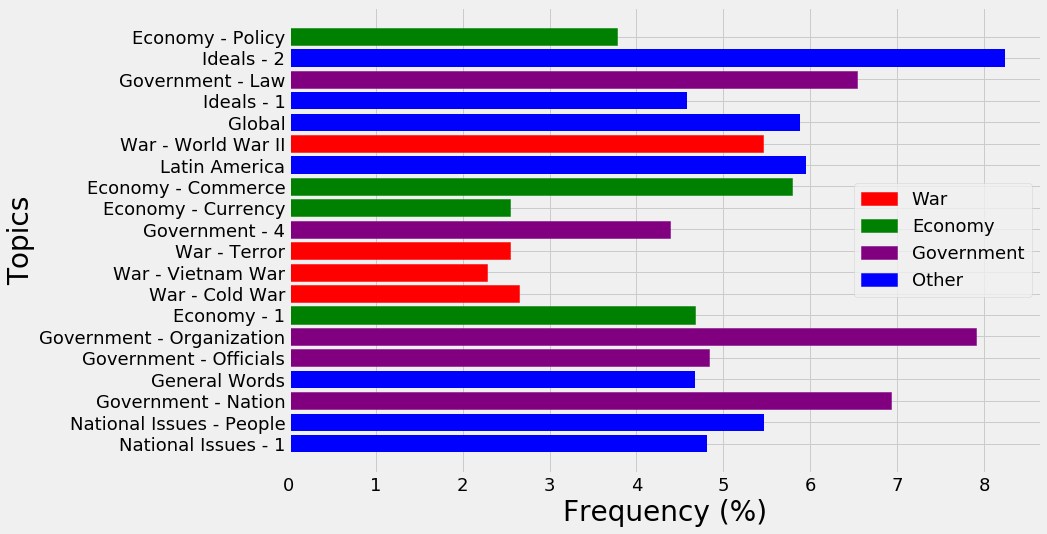

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color='blue')
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Topics')
ax.set_xlabel('Frequency (%)')

for top in war_tops:
    ax.get_children()[top].set_color(war_color)
for top in econ_tops:
    ax.get_children()[top].set_color(econ_color)
for top in gov_tops:
    ax.get_children()[top].set_color(gov_color)
    
war_patch = mpatches.Patch(color='red', label='War')
econ_patch = mpatches.Patch(color='green', label='Economy')
gov_patch = mpatches.Patch(color='purple', label='Government')
other_patch = mpatches.Patch(color='blue', label='Other')
plt.legend(handles=[war_patch, econ_patch, gov_patch, other_patch]);

## TSNE Plot

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 998 samples in 0.000s...
[t-SNE] Computed neighbors for 998 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 998 / 998
[t-SNE] Mean sigma: 0.231006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.063614
[t-SNE] Error after 1000 iterations: 0.626090


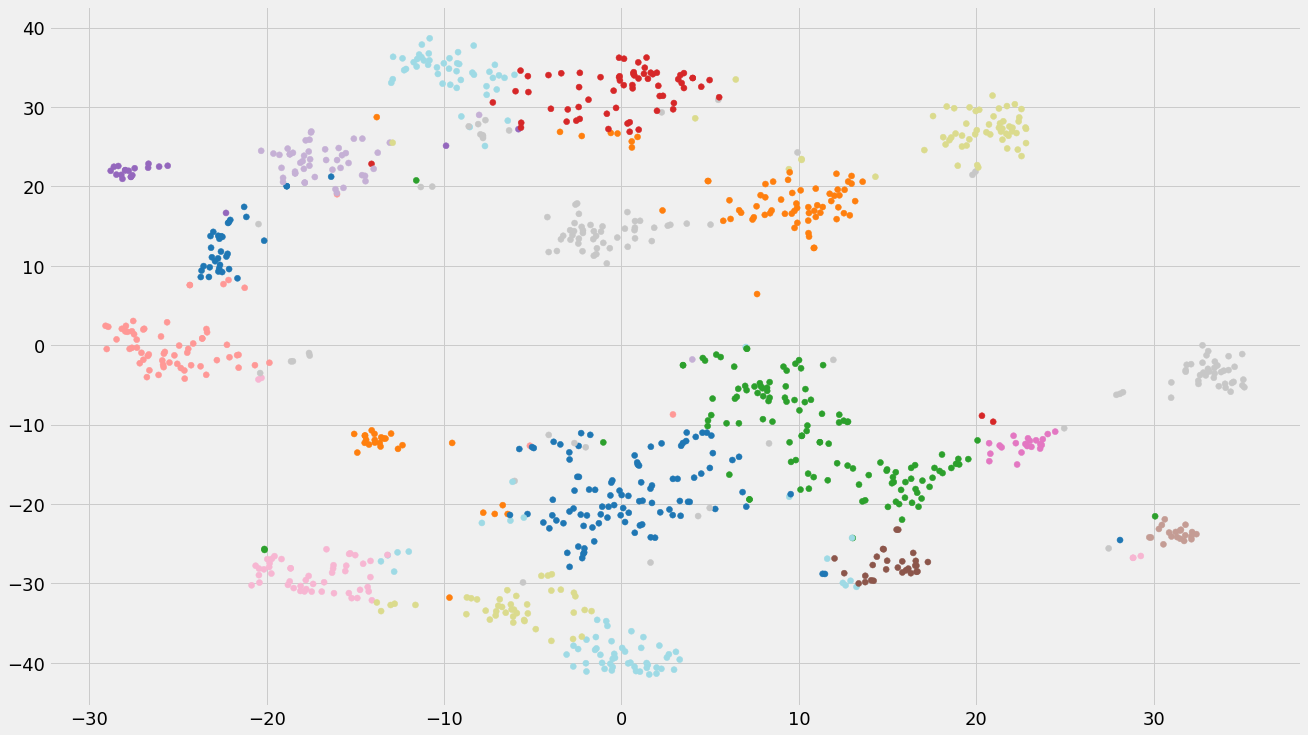

In [38]:
tsne_plot = TSNE(verbose=1, metric="cosine").fit_transform(topic_array)
doc_max_top = np.argmax(topic_array, axis=1)
plt.figure(figsize=(20,12))
plt.scatter(tsne_plot[:,0],tsne_plot[:,1], c=doc_max_top, alpha=1, cmap=plt.cm.get_cmap('tab20_r', 30))

# Sort Topics
Order topic components by weight (percentage) within each document

In [21]:
# topic component percentage array
top_val_sort = topic_df.values.copy()
# sort array by rows (ascending order)
top_val_sort.sort(axis=1)
# sort array in descending order
top_val_sort = top_val_sort[:, ::-1]

In [22]:
# sort topic label array by row (ascending order)
top_lab_sort = np.argsort(topic_df.values)
# sort array in descending order
top_lab_sort = top_lab_sort[:, ::-1]

In [23]:
# interweave sorted label and value arrays for dataframe
top_sort = np.empty((num_docs, num_tops*2))
top_sort[:, 0::2] = top_lab_sort
top_sort[:, 1::2] = top_val_sort

In [24]:
# create primary column labels for dataframe
top_order = []

for place in range(0, num_tops):
    top_order.append('Topic ' + str(place+1))

In [25]:
# function to map topic labels
def top_map(x):
    return(topic_dict[x])

In [26]:
# create final topic dataframe
top_topic_df = pd.DataFrame(top_sort, dtype=int)
# map topic labels
top_topic_df.iloc[:, ::2] = top_topic_df.iloc[:, ::2].applymap(top_map)
# create index for multi-dimensional dataframe
m_idx = pd.MultiIndex.from_product([top_order, ['Topic', '%']])
# create multidimensional dataframe
top_topic_df = pd.DataFrame(top_topic_df.values, columns=m_idx)
# retain only highest topics
top_topic_df = top_topic_df[top_order[:8]]
top_topic_df.head()

Topic 1                        Topic 2      \
                       Topic   %                      Topic   %   
0  Government - Organization  68        National Issues - 1  19   
1  Government - Organization  74        Government - Nation   9   
2        National Issues - 1  45  Government - Organization  39   
3        National Issues - 1  76         Economy - Commerce  10   
4        Government - Nation  45              Latin America  18   

                  Topic 3                     Topic 4      \
                    Topic   %                   Topic   %   
0              Ideals - 2   7  Government - Officials   3   
1              Ideals - 2   6     National Issues - 1   5   
2        Government - Law   6     Government - Nation   5   
3  Government - Officials   6        Government - Law   5   
4     National Issues - 1  13                  Global  10   

                     Topic 5                      Topic 6     \
                       Topic  %                     Topic  %   
0        Government - Nation  2  National Issues - People  0   
1                     Global  5         War - Vietnam War  0   
2                     Global  3  National Issues - People  2   
3  Government - Organization  1            War - Cold War  1   
4                 Ideals - 2  6             General Words  4   

                    Topic 7                      Topic 8     
                      Topic  %                     Topic  %  
0             General Words  0               Economy - 1  0  
1  National Issues - People  0             General Words  0  
2              War - Terror  1        Economy - Commerce  0  
3         War - Vietnam War  0  National Issues - People  0  
4            Government - 4  4        Economy - Commerce  1

In [27]:
# insert transcript info into top topics dataframe
address_df = top_topic_df.copy()
for column in transcripts.columns[::-1]:
    address_df.insert(0, column, transcripts[column])
address_df.head()

Title        Date  \
                                                                   
0            April 30, 1789: First Inaugural Address  1789-04-30   
1         October 3, 1789: Thanksgiving Proclamation  1789-10-03   
2  January 8, 1790: First Annual Message to Congress  1790-01-08   
3  December 8, 1790: Second Annual Message to Con...  1790-12-08   
4  December 29, 1790: Talk to the Chiefs and Coun...  1790-12-29   

           President          Type  \
                                     
0  George Washington  inauguration   
1  George Washington         other   
2  George Washington   state_union   
3  George Washington   state_union   
4  George Washington         other   

                                          Transcript  \
                                                       
0  Fellow Citizens of the Senate and the House of...   
1  Whereas it is the duty of all Nations to ackno...   
2  Fellow Citizens of the Senate and House of Rep...   
3  Fellow citizens of the Senate and House of Rep...   
4  I the President of the United States, by my ow...   

                     Topic 1                        Topic 2      \
                       Topic   %                      Topic   %   
0  Government - Organization  68        National Issues - 1  19   
1  Government - Organization  74        Government - Nation   9   
2        National Issues - 1  45  Government - Organization  39   
3        National Issues - 1  76         Economy - Commerce  10   
4        Government - Nation  45              Latin America  18   

                  Topic 3 ...                 Topic 4      \
                    Topic ...                   Topic   %   
0              Ideals - 2 ...  Government - Officials   3   
1              Ideals - 2 ...     National Issues - 1   5   
2        Government - Law ...     Government - Nation   5   
3  Government - Officials ...        Government - Law   5   
4     National Issues - 1 ...                  Global  10   

                     Topic 5                      Topic 6     \
                       Topic  %                     Topic  %   
0        Government - Nation  2  National Issues - People  0   
1                     Global  5         War - Vietnam War  0   
2                     Global  3  National Issues - People  2   
3  Government - Organization  1            War - Cold War  1   
4                 Ideals - 2  6             General Words  4   

                    Topic 7                      Topic 8     
                      Topic  %                     Topic  %  
0             General Words  0               Economy - 1  0  
1  National Issues - People  0             General Words  0  
2              War - Terror  1        Economy - Commerce  0  
3         War - Vietnam War  0  National Issues - People  0  
4            Government - 4  4        Economy - Commerce  1  

[5 rows x 21 columns]

In [28]:
# save dataframe
# address_df.to_csv('data/address.csv')

## Topic Exploration of state of union speeches during war years

In [152]:
# specify war years for retrieval

war_yr = ['1813', '1814', '1847', '1862', '1863', '1864',
          '1918', '1942', '1943', '1944', '1945', '1965', 
          '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
          '1991', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']

In [153]:
state_df.loc[state_df['date'].isin(war_yr)]

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
32,1814 state_union James Madison,state_union,James Madison,1814,In meeting you at the present interesting conj...,16,84,4,11,14,5,19,0,8,0
74,1847 state_union James K. Polk,state_union,James K. Polk,1847,The annual meeting of Congress is always an in...,11,68,16,15,14,7,10,6,0,4
93,1862 state_union Abraham Lincoln,state_union,Abraham Lincoln,1862,Since your last annual assembling another year...,0,24,10,18,7,18,11,12,3,6
94,1863 state_union Abraham Lincoln,state_union,Abraham Lincoln,1863,Another year of health and of sufficiently abu...,0,42,14,13,7,12,15,11,16,9
96,1864 state_union Abraham Lincoln,state_union,Abraham Lincoln,1864,Again the blessings of health and abundant har...,0,36,10,19,16,14,7,10,14,5
171,1918 state_union Woodrow Wilson,state_union,Woodrow Wilson,1918,The year that has elapsed since I last stood b...,15,29,5,27,3,14,16,11,2,7
209,1942 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1942,In fulfilling my duty to report upon the State...,16,44,15,34,12,12,3,8,2,2
210,1943 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1943,"Mr. Vice President, Mr. Speaker, Members of th...",16,40,15,30,12,8,3,6,2,6
211,1944 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1944,"To the Congress:,This Nation in the past two y...",15,29,3,19,16,13,12,10,2,10
214,1945 state_union Franklin Delano Roosevelt,state_union,Franklin Delano Roosevelt,1945,"In considering the State of the Union, the war...",16,40,15,32,2,14,12,9,9,2


In [140]:
inaug_df = speech_top_df[speech_top_df['type'] == 'inauguration']

In [141]:
inaug_df.loc[inaug_df['date'].isin(war_yr)]

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
31,1813 inauguration James Madison,inauguration,James Madison,1813,About to add the solemnity of an oath to the o...,16,84,14,8,7,6,3,1,4,1
215,1945 inauguration Franklin Delano Roosevelt,inauguration,Franklin Delano Roosevelt,1945,"Mr. Chief Justice, Mr. Vice President, my frie...",15,73,3,26,12,1,9,0,8,0
253,1965 inauguration Lyndon Baines Johnson,inauguration,Lyndon Baines Johnson,1965,"My fellow countrymen, on this occasion, the oa...",3,63,1,17,16,14,7,6,19,1
260,1969 inauguration Richard Nixon,inauguration,Richard Nixon,1969,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...",3,63,1,29,15,7,19,1,8,0
330,2005 inauguration George W. Bush,inauguration,George W. Bush,2005,", Mr. Chief Justice, ,, ,, ,, reverend clergy,...",3,45,13,44,1,10,7,1,19,0


In [142]:
conv_df = speech_top_df[speech_top_df['type'] == 'convention']

In [143]:
conv_df.loc[conv_df['date'].isin(war_yr)]

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
95,1864 convention Abraham Lincoln,convention,Abraham Lincoln,1864,"HON. WILLIAM DENNISON AND OTHERS, a Committee ...",8,59,11,41,19,0,1,0,2,0
212,1944 convention Franklin D. Roosevelt,convention,Franklin D. Roosevelt,1944,I have already indicated to you why I accept t...,15,55,3,14,2,14,8,9,9,4
213,1944 convention Thomas Dewey,convention,Thomas Dewey,1944,",I am profoundly moved by the trust you have ...",15,39,8,24,1,13,3,12,16,6
256,1968 convention Richard Nixon,convention,Richard Nixon,1968,Sixteen years ago I stood before this Conventi...,1,41,19,23,15,20,8,9,13,5
257,1968 convention Hubert H. Humphrey,convention,Hubert H. Humphrey,1968,This moment—this moment is one of personal pri...,1,30,19,27,3,18,8,13,15,13
328,2004 convention George W. Bush,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u...",13,53,1,21,9,12,12,11,8,3
329,2004 convention John F. Kerry,convention,John F. Kerry,2004,We are here tonight because we love our countr...,1,53,13,17,9,17,15,5,8,5


In [144]:
speech_top_df[speech_top_df['speaker'] == 'George W. Bush']

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
321,2000 convention George W. Bush,convention,George W. Bush,2000,"Thank you. Thank you for this honor. [,],Thank...",1,31,9,20,3,13,8,11,12,11
323,2001 inauguration George W. Bush,inauguration,George W. Bush,2001,",, ,, ,, ,, distinguished guests and my fello...",3,36,13,32,1,25,7,3,14,3
324,2001 state_union George W. Bush,state_union,George W. Bush,2001,"Mr. Speaker, Mr. Vice President, Members of Co...",12,58,1,15,18,11,13,8,10,3
325,2002 state_union George W. Bush,state_union,George W. Bush,2002,"Thank you very much. Mr. Speaker, Vice Preside...",13,59,6,17,12,9,9,9,1,5
326,2003 state_union George W. Bush,state_union,George W. Bush,2003,"Mr. Speaker, Vice President Cheney, members of...",13,59,12,27,9,4,18,4,19,2
327,2004 state_union George W. Bush,state_union,George W. Bush,2004,"Mr. Speaker, Vice President Cheney, Members of...",13,57,12,33,1,7,5,2,19,0
328,2004 convention George W. Bush,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u...",13,53,1,21,9,12,12,11,8,3
330,2005 inauguration George W. Bush,inauguration,George W. Bush,2005,", Mr. Chief Justice, ,, ,, ,, reverend clergy,...",3,45,13,44,1,10,7,1,19,0
331,2005 state_union George W. Bush,state_union,George W. Bush,2005,"Mr. Speaker, Vice President Cheney, members of...",13,58,12,21,9,11,18,4,8,2
332,2006 state_union George W. Bush,state_union,George W. Bush,2006,"Mr. Speaker, Vice President Cheney, Members of...",13,51,1,14,12,13,18,8,2,4


In [145]:
speech_top_df[speech_top_df['speaker'] == 'Barack Obama']

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
334,2008 convention Barack Obama,convention,Barack Obama,2008,"With profound gratitude and great humility, I ...",1,42,9,36,13,11,8,9,5,3
337,2009 inauguration Barack Obama,inauguration,Barack Obama,2009,"My fellow citizens:,I stand here today humbled...",3,53,1,32,16,9,13,5,4,2
339,2009 state_union Barack Obama,state_union,Barack Obama,2009,"Madame Speaker, Mr. Vice President, Members of...",12,31,1,29,9,16,10,13,18,4
340,2010 state_union Barack Obama,state_union,Barack Obama,2010,"Madam Speaker, Vice President Biden, members o...",6,82,9,7,1,5,5,2,12,2
341,2011 state_union Barack Obama,state_union,Barack Obama,2011,Tonight I want to begin by congratulating the ...,1,41,9,29,12,17,5,11,6,1
342,2012 convention Barack Obama,convention,Barack Obama,2012,Thank you. Thank you. Thank you. Thank you so...,9,52,1,31,12,8,8,4,13,3
343,2012 state_union Barack Obama,state_union,Barack Obama,2012,"Thank you, thank you. Everybody, please be sea...",9,40,1,30,12,14,5,8,10,5
345,2013 state_union Barack Obama,state_union,Barack Obama,2013,", ,, ,, fellow citizens: ,, , declared to this...",1,39,12,28,9,20,5,8,13,3
346,2013 inauguration Barack Obama,inauguration,Barack Obama,2013,",, Mr. ,, ,, distinguished guests, and fellow...",3,49,1,30,13,15,7,3,16,2
347,2014 state_union Barack Obama,state_union,Barack Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",1,39,9,24,12,22,13,7,5,6


In [206]:
speech_top_df[speech_top_df['speaker'] == 'Donald J. Trump']

,index,type,speaker,date,speech,T1,T1%,T2,T2%,T3,T3%,T4,T4%,T5,T5%
351,2016 convention Donald J. Trump,convention,Donald J. Trump,2016,"U.S.A.! U.S.A.! U.S.A.!,Together, we will lead...",1,42,13,17,19,10,5,8,9,7
352,2017 state_union Donald J. Trump,state_union,Donald J. Trump,2017,"Mr. Speaker, Mr. Vice President, Members of Co...",1,33,6,17,13,12,9,11,12,7
354,2017 inauguration Donald J. Trump,inauguration,Donald J. Trump,2017,",, ,, ,, ,, ,, fellow Americans, and people o...",1,51,15,21,13,15,3,8,9,5
355,2018 state_union Donald J. Trump,state_union,Donald J. Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",1,35,13,24,19,18,12,10,16,6


## TSNE
Plot topic clusters and label them

In [75]:
# NMF fit-transform on TFIDF matrix
# output is weights matrix of # docs x # topics

doc_top = nmf.fit_transform(t_counts)

In [76]:
doc_top.shape

(356, 20)

In [77]:
# output is vector of highest weighted topic for each document
# length is # docs

doc_max_top = np.argmax(doc_top, axis=1)

In [78]:
doc_max_top.shape

(356,)

In [79]:
# TSNE fit-transform on weights matrix
# output is coordinate matrix of # docs x 2

from sklearn.manifold import TSNE

doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(doc_top)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 356 samples in 0.000s...
[t-SNE] Computed neighbors for 356 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 356 / 356
[t-SNE] Mean sigma: 0.315894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.453484
[t-SNE] Error after 1000 iterations: 0.389993


In [80]:
doc_plot

array([[ -8.387486  ,  16.015284  ],
       [-11.908947  ,  19.026947  ],
       [-11.162198  ,  21.380974  ],
       [-11.67337   ,  19.45233   ],
       [-12.119651  ,  19.677212  ],
       [-11.284419  ,  21.02223   ],
       [ -2.0888934 ,  -9.0169115 ],
       [ -9.595501  ,  17.676361  ],
       [-11.117333  ,  21.685816  ],
       [-10.639583  ,  22.835358  ],
       [ -7.9678206 ,  15.420524  ],
       [-11.027747  ,  24.85884   ],
       [ -8.162177  ,  14.569175  ],
       [-10.714951  ,  24.743294  ],
       [ -9.368259  ,  24.406143  ],
       [-10.816471  ,  24.297861  ],
       [ -7.4158354 ,  13.929151  ],
       [-10.279383  ,  23.462702  ],
       [ -9.806018  ,  24.03321   ],
       [-10.104298  ,  24.396507  ],
       [ -9.648397  ,  24.937067  ],
       [ -9.086963  ,  25.079863  ],
       [ -8.006598  ,  14.723761  ],
       [ -8.686325  ,  24.1454    ],
       [ -8.339695  ,  24.40431   ],
       [-10.037625  ,  24.932192  ],
       [ -7.911753  ,  16.28906   ],
 

In [81]:
doc_plot.shape

(356, 2)

Text(0.5,1,'tsne with max topic labels')

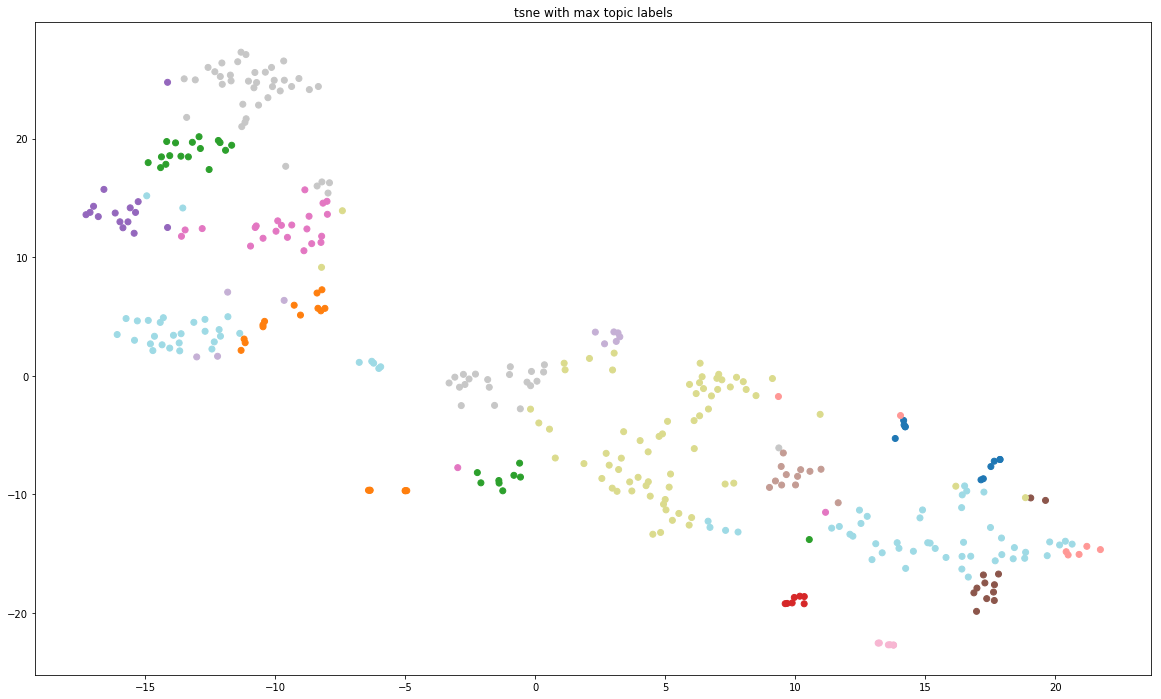

In [82]:
plt.figure(figsize=(20,12))
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top, alpha=1, cmap=plt.cm.get_cmap('tab20_r', 30))
plt.title("tsne with max topic labels")


In [83]:
doc_max_top

array([ 4, 14,  4, 14, 14,  4, 15,  4,  4,  4,  4,  4,  7,  4,  4,  4,  3,
        4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  4,  4,  4, 16, 16, 16, 14,
        4,  4,  4,  4, 11,  4,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4, 14,
        7, 14,  4, 14,  7,  4, 14, 14, 14,  7, 14, 14, 14, 14, 14,  7, 14,
       14, 11, 11, 11,  7, 11, 11, 11, 11,  7, 11, 11, 11,  0,  7,  0, 11,
        7,  7, 11, 11, 11,  7,  0,  7,  0,  0,  8,  0, 15,  7,  7,  7, 10,
        0,  7,  0,  0,  0,  0,  3,  0,  0,  0,  7, 10,  0,  0,  0,  7,  0,
        7,  0,  0,  0,  0,  7,  0, 10, 17,  0,  7,  0,  0, 17, 17, 17,  0,
        5, 10, 17, 17, 17, 17, 17, 17, 17, 17, 17,  5,  5,  0,  5,  3,  5,
        5,  5,  5,  5,  5,  0,  0,  0,  0,  3,  5,  3,  3,  3,  3,  5, 15,
        3, 15,  5, 10,  3,  5,  3,  5,  5,  5,  5,  5,  5,  5,  2,  2,  8,
        2,  3, 10, 10, 10,  8,  8, 10,  3, 10,  2,  3,  3,  3,  3,  2,  2,
        3,  2,  8,  3,  3, 16, 16, 15, 15, 15, 16, 15,  2,  2,  3,  8,  2,
        3,  2,  2,  2,  2

In [84]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [195]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 20))

    # We create a scatter plot.
    f = plt.figure(figsize=(20, 12), facecolor='#fbeeac')
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(20):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

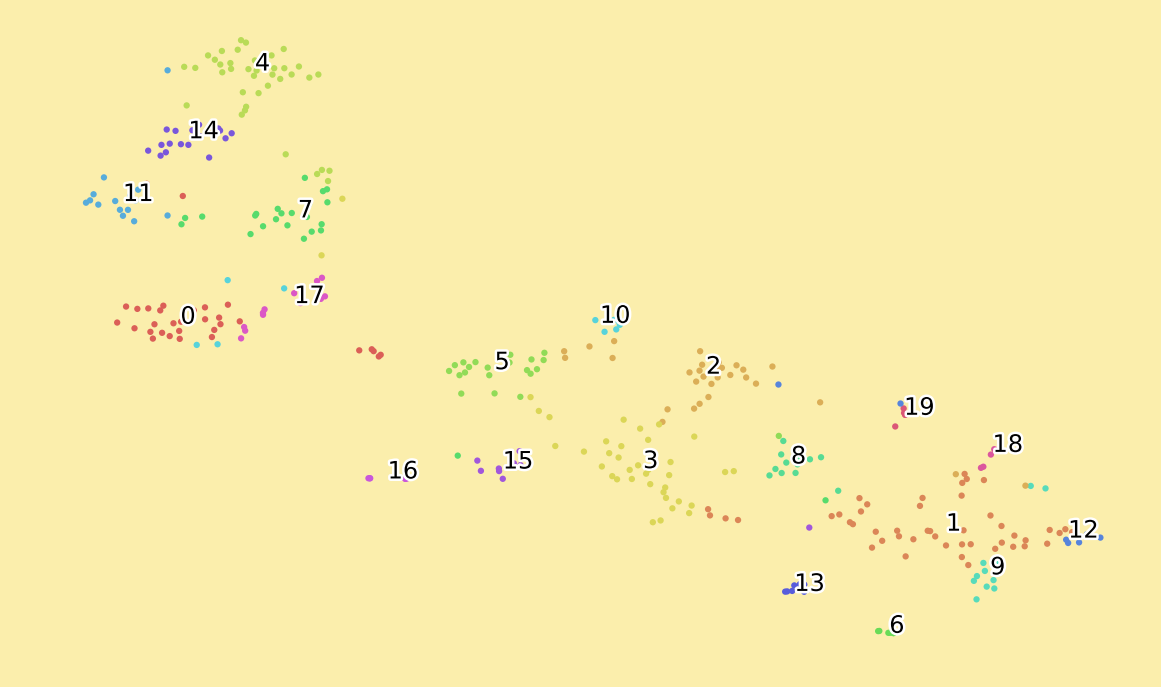

In [197]:
scatter(doc_plot, doc_max_top);
savefig('TSNE.png')